In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
import random
from datetime import datetime, timedelta
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

from google.colab import files

from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

In [47]:
# Performance metrics

def nash_sutcliffe_efficiency(observed, simulated):
    obs_mean = np.mean(observed)
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - obs_mean) ** 2)

    nse = 1 - (numerator / denominator)
    return nse

def calculate_rmse(observed, predicted):

    rmse = np.sqrt(np.mean((observed - predicted)**2))
    return rmse

def calculate_r2(observed, predicted):

    mean_observed = np.mean(observed)
    mean_predicted = np.mean(predicted)

    numerator = np.sum((observed - mean_observed) * (predicted - mean_predicted))
    denominator = np.sqrt(np.sum((observed - mean_observed)**2)) * np.sqrt(np.sum((predicted - mean_predicted)**2))

    r2 = (numerator / denominator)**2
    return r2

def calculate_mae(observed, predicted):
    mae = np.mean(np.abs(observed - predicted))
    return mae

def calculate_ca(rmse, mae, r2):
    ca = 0.33 * (rmse + mae + (1 - r2))
    return ca


In [48]:
#We import the model predictions, which were initially saved as excel files

daily = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/calage_biao.xlsx')
discharge1 = daily.iloc[1461:, 0].to_numpy()

hymolap = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/mean_trajectory1.xlsx')
hymolap1 = hymolap.iloc[:, 0].to_numpy()

hymolap_wxgboost1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/det_wxgboost.xlsx')
hymolap_wxgboost11 = hymolap_wxgboost1.iloc[:, 0].to_numpy()

hymolap_wgru1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/det_wgru.xlsx')
hymolap_wgru11 = hymolap_wgru1.iloc[:, 0].to_numpy()

hymolap_wxgboost2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/Sto_wxgboost.xlsx')
hymolap_wxgboost22 = hymolap_wxgboost2.iloc[:, 0].to_numpy()

hymolap_wgru2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/Sto_wgru.xlsx')
hymolap_wgru22 = hymolap_wgru2.iloc[:, 0].to_numpy()

In [49]:
len(discharge1), len(hymolap1), len(hymolap_wxgboost11), len(hymolap_wgru11), len(hymolap_wxgboost22), len(hymolap_wgru22)

(731, 731, 730, 728, 728, 728)

Check accuracy in the validation phase

In [50]:
# HyMoLAP
nse_value = nash_sutcliffe_efficiency(discharge1[1:], hymolap1[1:])     #Remove the first value because the time serie contains the initial condition Q0, which is observed data
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge1[1:], hymolap1[1:])
print('rmse=', rmse)

r2 = calculate_r2(discharge1[1:], hymolap1[1:])
print('r2=', r2)

mae = calculate_mae(discharge1[1:], hymolap1[1:])
print('mae=', mae)

print('CA=',calculate_ca(rmse, mae, r2))

Nash-Sutcliffe Efficiency (NSE): 0.8351971210572104
rmse= 87.67701629655316
r2= 0.8429304809209527
mae= 56.18640036755244
CA= 47.52676044045094


In [51]:
# hymolap_wxgboost1
nse_value = nash_sutcliffe_efficiency(discharge1[1:], hymolap_wxgboost11)  # We remove the first value because the best model here was
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge1[1:], hymolap_wxgboost11)
print('rmse=', rmse)

r2 = calculate_r2(discharge1[1:], hymolap_wxgboost11 )
print('r2=', r2)

mae = calculate_mae(discharge1[1:], hymolap_wxgboost11 )
print('mae=', mae)

print('CA=',calculate_ca(rmse, mae, r2))

Nash-Sutcliffe Efficiency (NSE): 0.8171483352304644
rmse= 92.3533863289839
r2= 0.8315614302829181
mae= 50.74172250538656
CA= 47.27697064334889


In [52]:
# hymolap_wgru1
nse_value = nash_sutcliffe_efficiency(discharge1[3:], hymolap_wgru11)   # We remove the first 3 values because the best model here was given by the lag (t,t-1,t-2)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge1[3:], hymolap_wgru11)
print('rmse=', rmse)

r2 = calculate_r2(discharge1[3:], hymolap_wgru11)
print('r2=', r2)

mae = calculate_mae(discharge1[3:], hymolap_wgru11)
print('mae=', mae)

print('CA=',calculate_ca(rmse, mae, r2))

Nash-Sutcliffe Efficiency (NSE): 0.8594837550827406
rmse= 81.03210505956007
r2= 0.8630001027520966
mae= 46.32274474940457
CA= 42.072310403050146


In [53]:
# hymolap_wxgboost2
nse_value = nash_sutcliffe_efficiency(discharge1[3:], hymolap_wxgboost22)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge1[3:], hymolap_wxgboost22)
print('rmse=', rmse)

r2 = calculate_r2(discharge1[3:], hymolap_wxgboost22)
print('r2=', r2)

mae = calculate_mae(discharge1[3:], hymolap_wxgboost22)
print('mae=', mae)

print('CA=',calculate_ca(rmse, mae, r2))

Nash-Sutcliffe Efficiency (NSE): 0.8805385933288705
rmse= 74.71497674964036
r2= 0.9007022451128595
mae= 48.22842490542066
CA= 40.6040908052829


In [54]:
# hymolap_wgru2
nse_value = nash_sutcliffe_efficiency(discharge1[3:], hymolap_wgru22)
print("Nash-Sutcliffe Efficiency (NSE):", nse_value)

rmse = calculate_rmse(discharge1[3:], hymolap_wgru22)
print('rmse=', rmse)

r2 = calculate_r2(discharge1[3:], hymolap_wgru22)
print('r2=', r2)

mae = calculate_mae(discharge1[3:], hymolap_wgru22)
print('mae=', mae)

print('CA=',calculate_ca(rmse, mae, r2))

Nash-Sutcliffe Efficiency (NSE): 0.8963508955720307
rmse= 69.59477425740495
r2= 0.9088863811513687
mae= 45.79975295394332
CA= 38.11026147396498


 Analysis

In [55]:
# We did this analysis for all model,  with same length for each class

daily = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/calage_biao.xlsx')
discharge1 = daily.iloc[1464:, 0].to_numpy()             #We remove the first three values to have same length and period

hymolap = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/mean_trajectory1.xlsx')
hymolap1 = hymolap.iloc[3:, 0].to_numpy()       #We remove the first three values to have same length and period

hymolap_wxgboost1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/det_wxgboost.xlsx')
hymolap_wxgboost11 = hymolap_wxgboost1.iloc[2:, 0].to_numpy()     #We remove the first two values to have same length and period


# We add the two standalone ML predictions
wxgboost_simp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/wxgb.xlsx')
wxgboost_simple = wxgboost_simp.iloc[:, 0].to_numpy()

wgru_simp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Bonou/wgru.xlsx')
wgru_simple = wgru_simp.iloc[:, 0].to_numpy()

In [56]:
len(discharge1), len(hymolap1), len(hymolap_wxgboost11), len(hymolap_wgru11), len(hymolap_wxgboost22), len(hymolap_wgru22), len(wxgboost_simple), len(wgru_simple)

(728, 728, 728, 728, 728, 728, 728, 728)

In [57]:
len(wgru_simple)

728

Violin Plots

<ipython-input-58-c851afe94fe9>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-58-c851afe94fe9>:32: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


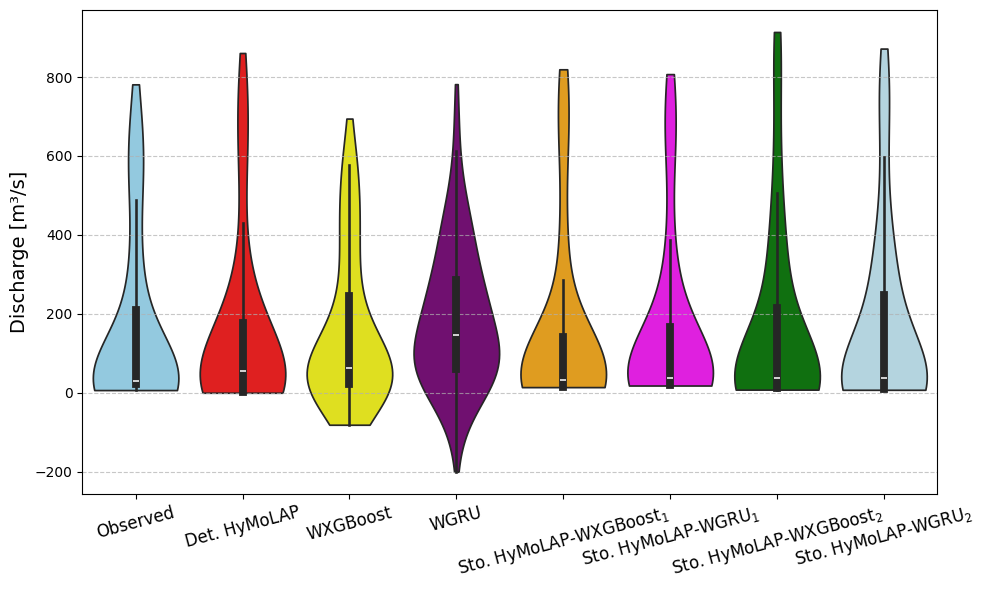

In [58]:
# Combine data into a single DataFrame for visualization
data = pd.DataFrame({
    # Create a categorical column for model identifiers
    "": (
        ["Observed"] * len(discharge1) +  # Labels for observed discharge
        ["Det. HyMoLAP"] * len(hymolap1) +  # Labels for deterministic HyMoLAP model
        ["WXGBoost"] * len(wxgboost_simple) +  # Labels for standalone WXGBoost model
        ["WGRU"] * len(wgru_simple) +  # Labels for standalone WGRU model
        ["Sto. HyMoLAP-WXGBoost$_1$"] * len(hymolap_wxgboost11) +  # Labels for hybrid model version 1 (HyMoLAP-WXGBoost)
        ["Sto. HyMoLAP-WGRU$_1$"] * len(hymolap_wgru11) +  # Labels for hybrid model version 1 (HyMoLAP-WGRU)
        ["Sto. HyMoLAP-WXGBoost$_2$"] * len(hymolap_wxgboost22) +  # Labels for hybrid model version 2 (HyMoLAP-WXGBoost)
        ["Sto. HyMoLAP-WGRU$_2$"] * len(hymolap_wgru22)  # Labels for hybrid model version 2 (HyMoLAP-WGRU)
    ),
    # Combine all discharge values into a single numerical column
    "Value": (
        list(discharge1) +  # Observed discharge values
        list(hymolap1) +  # Deterministic HyMoLAP discharge values
        list(wxgboost_simple) +  # Standalone WXGBoost discharge values
        list(wgru_simple) +  # Standalone WGRU discharge values
        list(hymolap_wxgboost11) +  # Hybrid model (HyMoLAP-WXGBoost version 1) discharge values
        list(hymolap_wgru11) +  # Hybrid model (HyMoLAP-WGRU version 1) discharge values
        list(hymolap_wxgboost22) +  # Hybrid model (HyMoLAP-WXGBoost version 2) discharge values
        list(hymolap_wgru22)  # Hybrid model (HyMoLAP-WGRU version 2) discharge values
    )
})

# Define a custom color palette for the violin plot
custom_palette = ["skyblue", "red", "yellow", "purple", "orange", "magenta", "green", "lightblue"]

# Plot a violin plot with the custom palette
plt.figure(figsize=(10, 6))  # Set figure size
sns.violinplot(
    x="",  # Use the categorical model identifiers for the x-axis
    y="Value",  # Use the discharge values for the y-axis
    data=data,  # Data source
    cut=0,  # Avoid extending the violins beyond the data range
    palette=custom_palette,  # Apply the custom color palette
    bw=0.5  # Adjust the bandwidth for smoother violins
)

# Add details to the plot
plt.ylabel("Discharge [m³/s]", fontsize=14)  # Label the y-axis
plt.xticks(rotation=15, fontsize=12)  # Rotate and adjust font size of x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines to improve readability

# Use tight_layout to prevent label overlap or cropping
plt.tight_layout()

# Save the plot as a .png file before displaying
plt.savefig("violin.png", format='png', dpi=500)

# Allow the user to download the saved plot file
#files.download("violin.png")

# Display the plot
plt.show()


Taylor Diagram

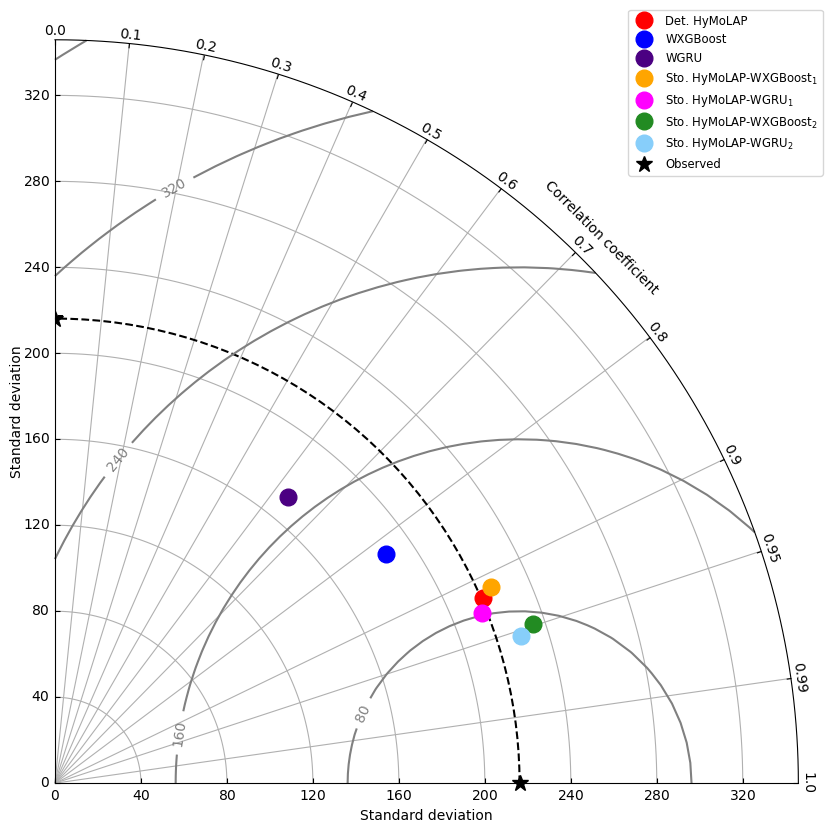

In [59]:
class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels
        rlocs = np.concatenate(((np.arange(11.0) / 10.0), [0.95, 0.99]))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, rlocs))))

        # Standard deviation axis extent
        self.smin = 0
        self.smax = 1.6 * self.STD

        gh = fa.GridHelperCurveLinear(
            tr,
            extremes=(0, (np.pi / 2), self.smin, self.smax),
            grid_locator1=gl1,
            tick_formatter1=tf1,
        )

        if fig is None:
            fig = plt.figure()
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # X axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standard deviation")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        #ax.axis['left'].label.set_pad(-1.5)  # Espacement entre l'axe et le titre (ajout de marge)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        # Y axis
        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].label.set_text("Standard deviation")
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].label.set_pad(-1.)  # Espacement entre l'axe et le titre (ajout de marge)
        ax.axis['right'].major_ticklabels.set_axis_direction('left')
        ax.axis['right'].label.set_axis_direction('top')

        # Disable the bottom axis
        ax.axis['bottom'].set_visible(False)

        ax.grid()

        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], self.STD, 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi / 2)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_')
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, *args, **kwargs)  # (theta, radius)
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(
            np.linspace(self.smin, self.smax), np.linspace(0, np.pi / 2)
        )
        RMSE = np.sqrt(
            np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts))
        )
        contours = self.ax.contour(ts, rs, RMSE, levels, **kwargs)
        return contours

def srl(obsSTD, models, correlations, labels, fname):
    fig = plt.figure(figsize=(8.2, 8.2))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Observed')  # Reference point

    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)

    colors = ["red", "blue", "indigo", "orange", "magenta", "forestgreen", "lightskyblue"]

    dia.samplePoints = []  # Reset sample points for clean legend
    for std, corr, label, color in zip(models['std'], correlations, labels, colors):
        dia.add_sample(std, corr, label=label, marker='o', color=color, markersize=12, linestyle='')

    # Include the "Observed" reference in the legend
    fig.legend(
        dia.samplePoints + [dia._ax.plot([0], [obsSTD], 'k*', ms=12, label='Observed')[0]],
        [p.get_label() for p in dia.samplePoints] + ['Observed'],
        numpoints=1, prop=dict(size='small'), loc='upper right', bbox_to_anchor=(1, 1)
    )

    plt.tight_layout()
    plt.savefig("Taylor.png", format='png', dpi=500)

    # Download the file to your laptop
    #files.download("Taylor.png")

    plt.show()



# Données à partir de discharge1 et models
observed = discharge1
models = {
    "Det. HyMoLAP": hymolap1,
    "WXGBoost": wxgboost_simple,
    "WGRU": wgru_simple,
    "Sto. HyMoLAP-WXGBoost$_1$": hymolap_wxgboost11,
    "Sto. HyMoLAP-WGRU$_1$": hymolap_wgru11,
    "Sto. HyMoLAP-WXGBoost$_2$": hymolap_wxgboost22,
    "Sto. HyMoLAP-WGRU$_2$": hymolap_wgru22,
}

std_obs = np.std(observed)
stats = []
for model_name, model_values in models.items():
    std_model = np.std(model_values)
    correlation = np.corrcoef(observed, model_values)[0, 1]
    stats.append((std_model, correlation, model_name))

std_models, correlations, labels = zip(*stats)

# Appeler la fonction pour tracer
fname = 'TaylorDiagram.jpg'
srl(std_obs, {'std': std_models}, correlations, labels, fname)


Error by Discharge classes

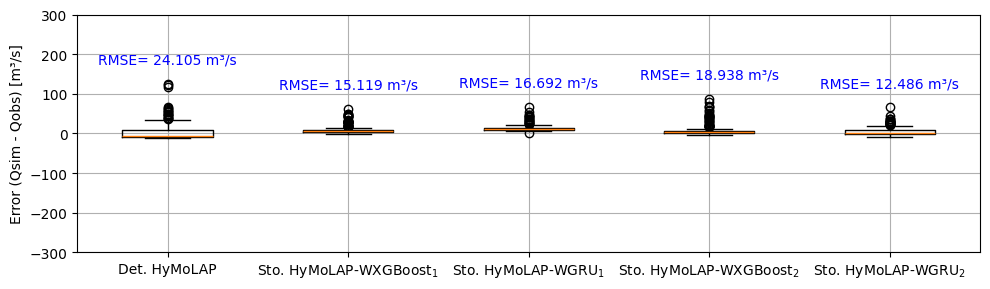

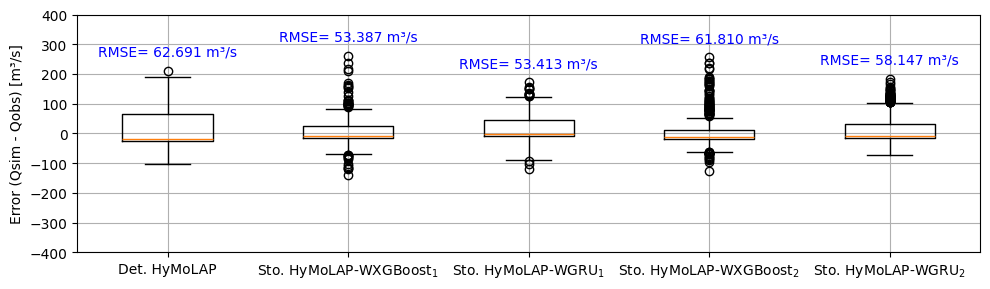

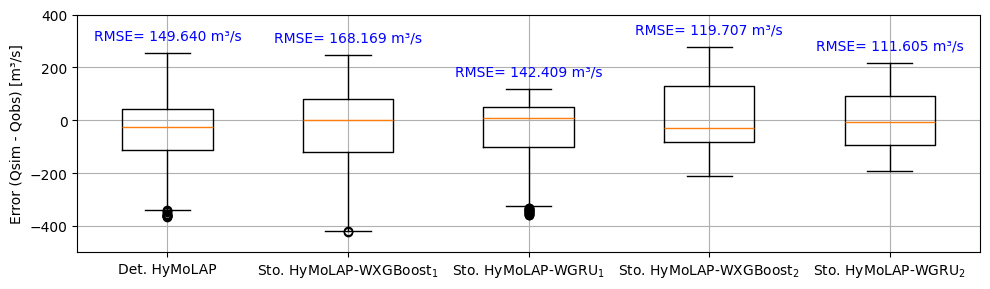

In [60]:
# Define models with their Predictions
models = {
    r"Det. HyMoLAP": hymolap1,
    r"Sto. HyMoLAP-WXGBoost$_1$": hymolap_wxgboost11,
    r"Sto. HyMoLAP-WGRU$_1$": hymolap_wgru11,
    r"Sto. HyMoLAP-WXGBoost$_2$": hymolap_wxgboost22,
    r"Sto. HyMoLAP-WGRU$_2$": hymolap_wgru22
}

# Define thresholds for discharge categories
low_threshold = np.percentile(discharge1, 25)
high_threshold = np.percentile(discharge1, 75)

# Prepare lists to store errors and RMSEs for each model and category
errors_low, errors_mid, errors_high = [], [], []
rmses_low, rmses_mid, rmses_high = {}, {}, {}

# Compute errors and RMSEs
for model_name, mean_trajectory in models.items():
    error = mean_trajectory - discharge1
    low_flows = error[discharge1 <= low_threshold]
    mid_flows = error[(discharge1 > low_threshold) & (discharge1 <= high_threshold)]
    high_flows = error[discharge1 > high_threshold]

    errors_low.append(low_flows)
    errors_mid.append(mid_flows)
    errors_high.append(high_flows)

    rmses_low[model_name] = calculate_rmse(discharge1[discharge1 <= low_threshold], mean_trajectory[discharge1 <= low_threshold])
    rmses_mid[model_name] = calculate_rmse(discharge1[(discharge1 > low_threshold) & (discharge1 <= high_threshold)], mean_trajectory[(discharge1 > low_threshold) & (discharge1 <= high_threshold)])
    rmses_high[model_name] = calculate_rmse(discharge1[discharge1 > high_threshold], mean_trajectory[discharge1 > high_threshold])

# Function to plot errors with optional ylim parameter
def plot_errors(errors, rmses, title, ylim_range=None):
    plt.figure(figsize=(10, 3))
    plt.boxplot(errors, labels=models.keys())
    plt.ylabel('Error (Qsim - Qobs) [m³/s]')
    plt.title(title)
    plt.grid(True)

    # Annotate RMSE values
    for i, (model_name, rmse) in enumerate(rmses.items(), start=1):
        plt.text(i, np.max(errors[i-1])+50, f'RMSE= {rmse:.3f} m³/s',
                 horizontalalignment='center', fontsize=10, color='blue')

    # Apply ylim only if specified
    if ylim_range is not None:
        plt.ylim(ylim_range)
    plt.tight_layout()

# Plot with specified ylim for the first two categories
plot_errors(errors_low, rmses_low, '', ylim_range=(-300, 300))
plt.savefig("error_low_flow.png", format='png', dpi=500)
#files.download("error_low_flow.png")
plt.show()

plot_errors(errors_mid, rmses_mid, '', ylim_range=(-400, 400))
plt.savefig("error_mid_flow.png", format='png', dpi=500)
#files.download("error_mid_flow.png")
plt.show()

# No ylim specified for high flow category
plot_errors(errors_high, rmses_high, '', ylim_range=(-500, 400))
plt.savefig("error_high_flow.png", format='png', dpi=500)
#files.download("error_high_flow.png")
plt.show()


In [61]:
np.std(hymolap1)

217.13410159590296

In [62]:
np.std(discharge1)

216.16921899772183

In [63]:
np.std(hymolap_wgru22)

227.31866241609757